In [13]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 

In [14]:
data = pd.read_csv('musteri.csv')

In [15]:
data.head()

,musteri,cinsiyet,yaş,gelir,harcamapuan
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [16]:
x = data.iloc[:,[3,4]].values

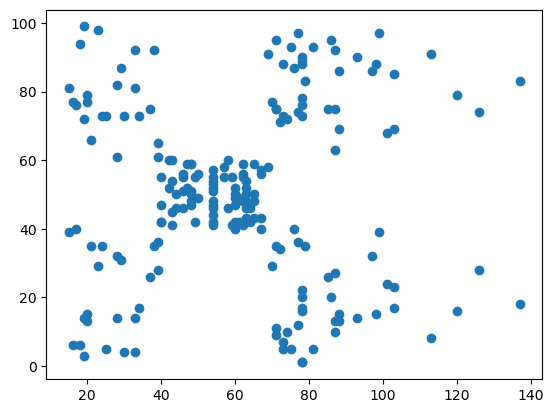

In [17]:
plt.scatter(data["gelir"],data["harcamapuan"])

c:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are les

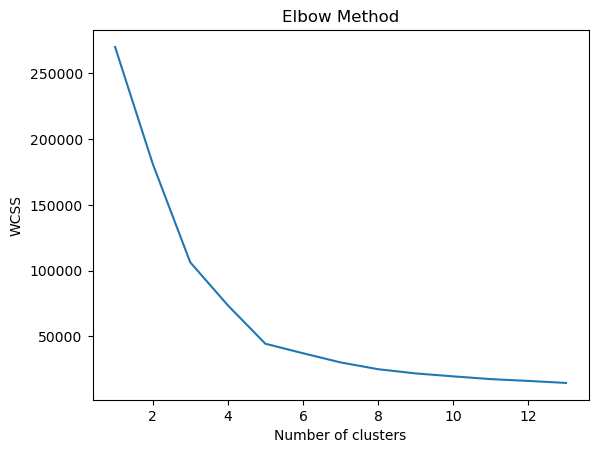

In [18]:
from sklearn.cluster import KMeans  
wcss = []
for i in range(1, 14):
    kmeans = KMeans(n_clusters = i, init = 'k-means++') #k-means++ is an random algorithm used to initialize the centroid // k-means++ bir merkez noktası başlatmak için kullanılan rastgele bir algoritmadır
    kmeans.fit(x) #fitting the kmeans algorithm to dataset // kmeans algoritmasını veri kümesine ayarlama
    wcss.append(kmeans.inertia_) #inertia_ is the formula used to segregate the data points into clusters // inertia_ veri noktalarını kümeler halinde ayırmak için kullanılan formül
plt.plot(range(1, 14), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


In [19]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++') #k-means++ is an random algorithm used to initialize the centroid // k-means++ bir merkez noktası başlatmak için kullanılan rastgele bir algoritmadır
yhem = kmeans.fit_predict(x) #fitting the kmeans algorithm to dataset  // kmeans algoritmasını veri kümesine ayarlama

c:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


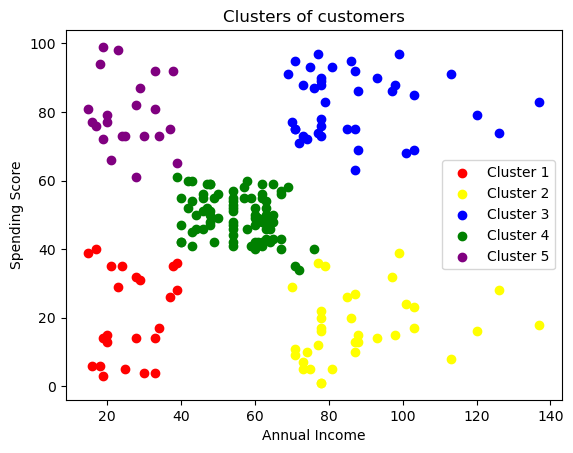

In [20]:
plt.scatter(x[yhem == 0, 0], x[yhem == 0, 1], c = 'red', label = 'Cluster 1')
plt.scatter(x[yhem == 1, 0], x[yhem == 1, 1], c = 'yellow', label = 'Cluster 2')
plt.scatter(x[yhem == 2, 0], x[yhem == 2, 1], c = 'blue', label = 'Cluster 3')
plt.scatter(x[yhem == 3, 0], x[yhem == 3, 1], c = 'green', label = 'Cluster 4')
plt.scatter(x[yhem == 4, 0], x[yhem == 4, 1], c = 'purple', label = 'Cluster 5')
plt.title('Clusters of customers')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.show()


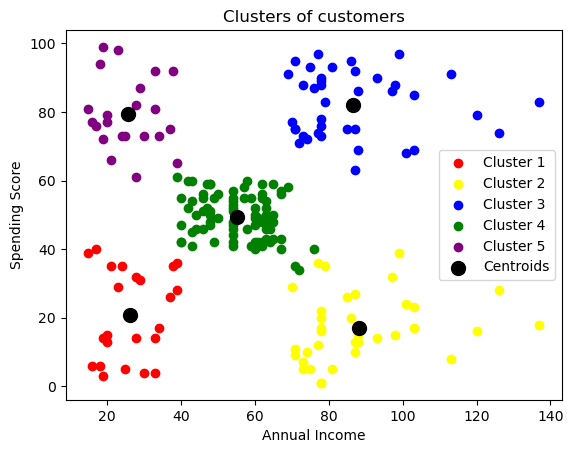

In [21]:
plt.scatter(x[yhem == 0, 0], x[yhem == 0, 1], c = 'red', label = 'Cluster 1')
plt.scatter(x[yhem == 1, 0], x[yhem == 1, 1], c = 'yellow', label = 'Cluster 2')
plt.scatter(x[yhem == 2, 0], x[yhem == 2, 1], c = 'blue', label = 'Cluster 3')
plt.scatter(x[yhem == 3, 0], x[yhem == 3, 1], c = 'green', label = 'Cluster 4')
plt.scatter(x[yhem == 4, 0], x[yhem == 4, 1], c = 'purple', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],s=100, c = 'black', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.show()


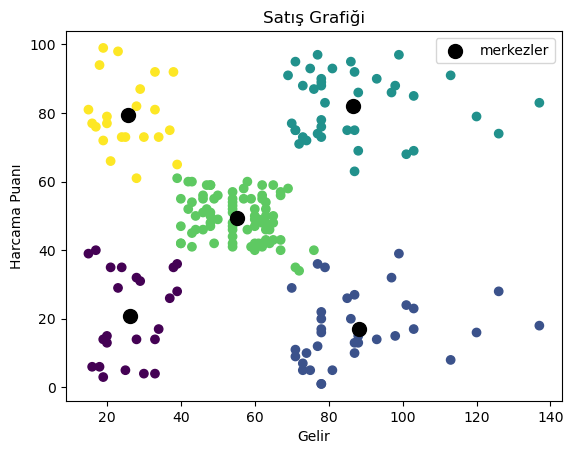

In [22]:
plt.scatter(x[:,0],x[:,1],c=kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=100,c='black',label='merkezler')
plt.title('Satış Grafiği')
plt.xlabel('Gelir')
plt.ylabel('Harcama Puanı')
plt.legend()
plt.show()
    

In [23]:
kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1]

(array([26.30434783, 88.2       , 86.53846154, 55.2962963 , 25.72727273]),
 array([20.91304348, 17.11428571, 82.12820513, 49.51851852, 79.36363636]))

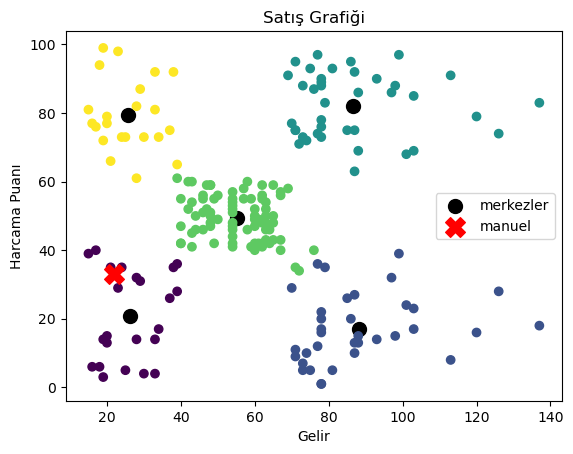

In [24]:
manuel_deger = np.array([22,33])
kume_no = kmeans.predict([manuel_deger]) 
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=100,c='black',label='merkezler')
plt.scatter(x[:,0],x[:,1],c=kmeans.labels_)   

plt.scatter(manuel_deger[0],manuel_deger[1],c='red',label='manuel',s=200,marker="X")
plt.title('Satış Grafiği')
plt.xlabel('Gelir')
plt.ylabel('Harcama Puanı')
plt.legend()
plt.show()
